# PGR107 PYTHON PROGRAMMING COURSE GROUP ASSIGNMENT
## Group Members: Maximillian Philip Dyremyhr, Jonas Kemi, Frank Miller, Tam Duy Vo

## Project Description
Dataset: Case 1_Organisation_1 (i.e. Actual Costs, Employee_data, Master Data)

To complete the assignment, answer the following questions:

1. Provide a simple analysis (e.g. yearly, quarterly, monthly) of the actual costs incurred over last three years. What trends do you see?
2. Compare the costs across the different locations (E.g. Denmark as compared to India and Japan) and report at-least one interesting fact.
3. Calculate Cost/Employee across the Locations. Please use only People costs (account group) while calculating Cost/Employee. Report one interesting fact.
4. Explain your data loading, transformation (cleaning) with every line of code and the steps you took to clean the dirty data (if any).

### Dataset Used:
DTO_EMPLOYEES_REA_2018_C for Employees Data Total_Operating_Costs/Actual_Costs for costs data, DIM_MASTER_ORGANISATION and DIM_MASTER_ACCOUNTGROUPS are the master data.

### Steps:
1. Load, clean, and explore Cost Data.
2. Load, clean, and explore Cost Data.
3. Merge or join Cost with Master data.
4. Load, clean, and explore Employees Data.
5. Merge or join Employees with Master data.
6. Visualize and explore Cost and Employees data separately.
7. Visualize and explore cost and employees (e.g. calculate people cost per employee, etc)

In [1]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
%matplotlib inline

In [2]:
# Changing number display format
pd.options.display.float_format = "{:,.2f}".format

In [3]:
# Loading the datasets
EMP = pd.read_csv('C://Users//kemij//Dropbox//Data///DTO//Employee_data//DTO_EMPLOYEES_REA_2018_C.csv',sep=",")
DIM_Master_Org = pd.read_csv('C://Users//kemij//Dropbox//Data//Master_Data//DIM_MASTER_ORGANISATION.csv',sep=";")

#importing "total cost" dataset using glob
from glob import glob
totalcost = glob('C:/Users/kemij/Dropbox/Data/DTO/Total_Operating_Costs/Actual_Costs/DTO_TOC_REA_*.csv')

In [4]:
# Checking EMP data
EMP

Cost Center  1/1/2018  2/1/2018  3/1/2018  4/1/2018  5/1/2018  6/1/2018  \
0            360      2.00      2.00      2.00      2.00      2.00      2.00   
1            239      1.00      1.00      1.00       nan       nan       nan   
2            518       nan       nan       nan       nan       nan       nan   
3             84       nan       nan       nan       nan       nan       nan   
4            537       nan       nan       nan       nan       nan       nan   
..           ...       ...       ...       ...       ...       ...       ...   
498          124    192.00    212.00    195.00     24.00     24.00     24.00   
499          119    236.00    222.00    216.00    238.00    239.00    245.00   
500          110    247.00     24.00    243.00    253.00    253.00    253.00   
501           97    254.00     25.00    248.00    253.00    254.00    254.00   
502          100     49.00    482.00    487.00    614.00    627.00    635.00   

     7/1/2018  8/1/2018  9/1/2018  ...  5/1/2019  6/1/2019  7/1/2019  \
0        2.00      2.00      2.00  ...      2.00      2.00      2.00   
1         nan       nan       nan  ...      1.00      1.00      1.00   
2         nan       nan       nan  ...       nan       nan       nan   
3         nan       nan       nan  ...      8.00      8.00      8.00   
4         nan       nan       nan  ...      9.00      9.00      9.00   
..        ...       ...       ...  ...       ...       ...       ...   
498     27.00     27.00    185.00  ...     19.00     18.00    186.00   
499    247.00    252.00    252.00  ...    249.00    249.00     32.00   
500    254.00    254.00    254.00  ...    246.00    231.00    224.00   
501    255.00    255.00    255.00  ...    278.00    239.00    251.00   
502    642.00    642.00    666.00  ...     48.00    375.00    393.00   

     8/1/2019  1/1/2020  2/1/2020  3/1/2020  4/1/2020  5/1/2020  6/1/2020  
0        2.00      2.00      2.00      2.00      2.00      2.00      2.00  
1        1.00       nan       nan       nan       nan       nan       nan  
2        1.00      1.00      1.00      1.00      1.00      1.00      1.00  
3        8.00      6.00      6.00      6.00      6.00      6.00      6.00  
4        9.00     19.00     19.00     19.00     19.00     19.00     19.00  
..        ...       ...       ...       ...       ...       ...       ...  
498     19.00    139.00    139.00    139.00    138.00    138.00    138.00  
499    247.00    195.00    195.00    195.00    197.00    197.00    197.00  
500    217.00      2.00      2.00      2.00     23.00     24.00     24.00  
501    237.00    198.00    196.00    196.00    199.00      2.00      2.00  
502    380.00    564.00    564.00    564.00    617.00    634.00    639.00  

[503 rows x 27 columns]

In [5]:
# Checking DIM_Master data
DIM_Master_Org

Location Code Location    Company Department Number  Cost Center
0             1000    India  Company B              70_9           98
1             1000    India  Company B              70_9           99
2             1000    India  Company B              70_9          101
3             1000    India  Company B              70_9          103
4             1000    India  Company B              70_9          122
..             ...      ...        ...               ...          ...
672           7000  Denmark  Company E              28_1          542
673           7000  Denmark  Company E              28_1          553
674           7000  Denmark  Company E              28_1          555
675           7000  Denmark  Company F              11_5          525
676           7000  Denmark  Company F              11_5           89

[677 rows x 5 columns]

In [6]:
# Filling NaN values with '0' in EMP table 
EMP.fillna(0, inplace=True)

In [7]:
#Checking EMP data again
EMP

Cost Center  1/1/2018  2/1/2018  3/1/2018  4/1/2018  5/1/2018  6/1/2018  \
0            360      2.00      2.00      2.00      2.00      2.00      2.00   
1            239      1.00      1.00      1.00      0.00      0.00      0.00   
2            518      0.00      0.00      0.00      0.00      0.00      0.00   
3             84      0.00      0.00      0.00      0.00      0.00      0.00   
4            537      0.00      0.00      0.00      0.00      0.00      0.00   
..           ...       ...       ...       ...       ...       ...       ...   
498          124    192.00    212.00    195.00     24.00     24.00     24.00   
499          119    236.00    222.00    216.00    238.00    239.00    245.00   
500          110    247.00     24.00    243.00    253.00    253.00    253.00   
501           97    254.00     25.00    248.00    253.00    254.00    254.00   
502          100     49.00    482.00    487.00    614.00    627.00    635.00   

     7/1/2018  8/1/2018  9/1/2018  ...  5/1/2019  6/1/2019  7/1/2019  \
0        2.00      2.00      2.00  ...      2.00      2.00      2.00   
1        0.00      0.00      0.00  ...      1.00      1.00      1.00   
2        0.00      0.00      0.00  ...      0.00      0.00      0.00   
3        0.00      0.00      0.00  ...      8.00      8.00      8.00   
4        0.00      0.00      0.00  ...      9.00      9.00      9.00   
..        ...       ...       ...  ...       ...       ...       ...   
498     27.00     27.00    185.00  ...     19.00     18.00    186.00   
499    247.00    252.00    252.00  ...    249.00    249.00     32.00   
500    254.00    254.00    254.00  ...    246.00    231.00    224.00   
501    255.00    255.00    255.00  ...    278.00    239.00    251.00   
502    642.00    642.00    666.00  ...     48.00    375.00    393.00   

     8/1/2019  1/1/2020  2/1/2020  3/1/2020  4/1/2020  5/1/2020  6/1/2020  
0        2.00      2.00      2.00      2.00      2.00      2.00      2.00  
1        1.00      0.00      0.00      0.00      0.00      0.00      0.00  
2        1.00      1.00      1.00      1.00      1.00      1.00      1.00  
3        8.00      6.00      6.00      6.00      6.00      6.00      6.00  
4        9.00     19.00     19.00     19.00     19.00     19.00     19.00  
..        ...       ...       ...       ...       ...       ...       ...  
498     19.00    139.00    139.00    139.00    138.00    138.00    138.00  
499    247.00    195.00    195.00    195.00    197.00    197.00    197.00  
500    217.00      2.00      2.00      2.00     23.00     24.00     24.00  
501    237.00    198.00    196.00    196.00    199.00      2.00      2.00  
502    380.00    564.00    564.00    564.00    617.00    634.00    639.00  

[503 rows x 27 columns]

In [8]:
# Transposing EMP data with 'melt' method
EMP = pd.melt(EMP, id_vars=['Cost Center'], var_name='Date', value_name= 'Employees')

In [9]:
#Checking new EMP again
EMP

Cost Center      Date  Employees
0              360  1/1/2018       2.00
1              239  1/1/2018       1.00
2              518  1/1/2018       0.00
3               84  1/1/2018       0.00
4              537  1/1/2018       0.00
...            ...       ...        ...
13073          124  6/1/2020     138.00
13074          119  6/1/2020     197.00
13075          110  6/1/2020      24.00
13076           97  6/1/2020       2.00
13077          100  6/1/2020     639.00

[13078 rows x 3 columns]

In [10]:
# Checking data types of EMP table
EMP.dtypes

Cost Center      int64
Date            object
Employees      float64
dtype: object

In [11]:
#Extracting year and month by string method
EMP['Year'] = EMP['Date'].str.split("/").str.get(2)
EMP['Month'] = EMP['Date'].str.split("/").str.get(0)
EMP['Day'] = EMP['Date'].str.split("/").str.get(1)
del EMP['Day']

In [12]:
EMP

Cost Center      Date  Employees  Year Month
0              360  1/1/2018       2.00  2018     1
1              239  1/1/2018       1.00  2018     1
2              518  1/1/2018       0.00  2018     1
3               84  1/1/2018       0.00  2018     1
4              537  1/1/2018       0.00  2018     1
...            ...       ...        ...   ...   ...
13073          124  6/1/2020     138.00  2020     6
13074          119  6/1/2020     197.00  2020     6
13075          110  6/1/2020      24.00  2020     6
13076           97  6/1/2020       2.00  2020     6
13077          100  6/1/2020     639.00  2020     6

[13078 rows x 5 columns]

In [13]:
# Creating datetime object by pandas.to_datetime
EMP['Date'] = pd.to_datetime(EMP.Date, format='%m/%d/%Y', errors='coerce')
#Extract Year Month and YYYY-MM using this
EMP['Year'] = EMP['Date'].dt.year
EMP['Month'] = EMP['Date'].dt.month
EMP['YYYY-MM'] = EMP['Date'].dt.strftime('%Y-%m')

In [14]:
EMP.dtypes

Cost Center             int64
Date           datetime64[ns]
Employees             float64
Year                    int64
Month                   int64
YYYY-MM                object
dtype: object

In [15]:
EMP

Cost Center       Date  Employees  Year  Month  YYYY-MM
0              360 2018-01-01       2.00  2018      1  2018-01
1              239 2018-01-01       1.00  2018      1  2018-01
2              518 2018-01-01       0.00  2018      1  2018-01
3               84 2018-01-01       0.00  2018      1  2018-01
4              537 2018-01-01       0.00  2018      1  2018-01
...            ...        ...        ...   ...    ...      ...
13073          124 2020-06-01     138.00  2020      6  2020-06
13074          119 2020-06-01     197.00  2020      6  2020-06
13075          110 2020-06-01      24.00  2020      6  2020-06
13076           97 2020-06-01       2.00  2020      6  2020-06
13077          100 2020-06-01     639.00  2020      6  2020-06

[13078 rows x 6 columns]

## Joining Data Frames

In [16]:
#Join EMP and DIM_Master using Cost Center as the column
DTO_Employees_REA = pd.merge(EMP, DIM_Master_Org, how='left', on=['Cost Center','Cost Center'])

In [17]:
DTO_Employees_REA

Cost Center       Date  Employees  Year  Month  YYYY-MM  Location Code  \
0              360 2018-01-01       2.00  2018      1  2018-01           7000   
1              239 2018-01-01       1.00  2018      1  2018-01           7000   
2              518 2018-01-01       0.00  2018      1  2018-01           7000   
3               84 2018-01-01       0.00  2018      1  2018-01           7000   
4              537 2018-01-01       0.00  2018      1  2018-01           7000   
...            ...        ...        ...   ...    ...      ...            ...   
13151          124 2020-06-01     138.00  2020      6  2020-06           1000   
13152          119 2020-06-01     197.00  2020      6  2020-06           1000   
13153          110 2020-06-01      24.00  2020      6  2020-06           1000   
13154           97 2020-06-01       2.00  2020      6  2020-06           1000   
13155          100 2020-06-01     639.00  2020      6  2020-06           1000   

      Location    Company Department Number  
0      Denmark  Company D              56_6  
1      Denmark  Company D              77_7  
2      Denmark  Company A              64_6  
3      Denmark  Company B              22_1  
4      Denmark  Company D              46_6  
...        ...        ...               ...  
13151    India  Company B              70_9  
13152    India  Company B              70_9  
13153    India  Company B              70_9  
13154    India  Company B              70_9  
13155    India  Company B              70_9  

[13156 rows x 10 columns]

### Question 1: How many total employees work for the organisation and how many are in Finland and Denmark?
First to answer the question, we need to aggregate the data at the level of country, therefore group the data. We do that first and then try to plot the graphs.

In [18]:
# 1a. First lets do the groupby and sorting the long way
Employees = DTO_Employees_REA.groupby(['YYYY-MM', 'Date']).Employees.sum().reset_index()
Employees.sort_values(by=['YYYY-MM'], inplace = True)

In [19]:
# This table shows the total number of employees every month in the entire organisation. 
Employees

YYYY-MM       Date  Employees
0   2018-01 2018-01-01   8,369.00
1   2018-02 2018-02-01   7,973.00
2   2018-03 2018-03-01   8,530.00
3   2018-04 2018-04-01   8,593.00
4   2018-05 2018-05-01   9,392.00
5   2018-06 2018-06-01   8,941.00
6   2018-07 2018-07-01   9,392.00
7   2018-08 2018-08-01   9,217.00
8   2018-09 2018-09-01   9,717.00
9   2018-10 2018-10-01   9,834.00
10  2018-11 2018-11-01   9,915.00
11  2018-12 2018-12-01   9,852.00
12  2019-01 2019-01-01  10,371.00
13  2019-02 2019-02-01  11,454.00
14  2019-03 2019-03-01  11,994.00
15  2019-04 2019-04-01  11,058.00
16  2019-05 2019-05-01  11,137.00
17  2019-06 2019-06-01  11,756.00
18  2019-07 2019-07-01  11,787.00
19  2019-08 2019-08-01  10,578.00
20  2020-01 2020-01-01   8,504.00
21  2020-02 2020-02-01   8,920.00
22  2020-03 2020-03-01   8,881.00
23  2020-04 2020-04-01   9,120.00
24  2020-05 2020-05-01   9,307.00
25  2020-06 2020-06-01   9,200.00

Text(0.5, 1.0, 'Employee Growth Over Time')

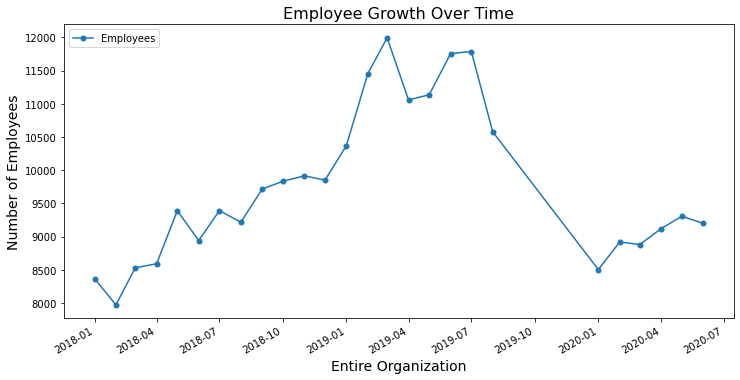

In [20]:
#ax = Employees.plot(x='Date', y='Employees', label ='Entire Organization' , figsize=(12,6), title = 'Employee growth over time', marker ='.', markersize=10)

ax = Employees.plot(x='Date', y='Employees', figsize=(12,6), marker ='.', markersize=10)
plt.legend(loc='upper left')

ax.set_ylabel('Number of Employees',fontsize = 14)
ax.set_xlabel('Entire Organization', fontsize = 14)
ax.set_title('Employee Growth Over Time',fontsize = 16)

Number Of Employees is the lowest at February-2018 and the highest at March-2019. Number of employees is increasing between these dates and after July-2019 the company has been witnessed to a sharp decrease until January-2020. After January-2020 number of employees is increasing again but it is still very far from the highest amount.

In [21]:
# Plot all the countries in one graph
Employees_Sum = DTO_Employees_REA.groupby(['Location','YYYY-MM', 'Date']).Employees.sum().reset_index()
Employees.sort_values(by=['YYYY-MM'], inplace = True)
Employees_Sum = pd.pivot_table(Employees_Sum, values = 'Employees', index=['Date'], columns=['Location'], aggfunc=sum)
Employees_Sum['Total']=Employees_Sum['Denmark']+Employees_Sum['Finland']+Employees_Sum['India']+Employees_Sum['Japan']+Employees_Sum['USA']

In [22]:
Employees_Sum

Location    Denmark  Finland    India  Japan    USA     Total
Date                                                         
2018-01-01 4,999.00   847.00 1,764.00 650.00 109.00  8,369.00
2018-02-01 4,919.00   735.00 1,708.00 505.00 106.00  7,973.00
2018-03-01 4,994.00   711.00 2,057.00 657.00 111.00  8,530.00
2018-04-01 4,815.00   817.00 2,267.00 589.00 105.00  8,593.00
2018-05-01 5,381.00   997.00 2,273.00 646.00  95.00  9,392.00
2018-06-01 4,916.00   997.00 2,353.00 581.00  94.00  8,941.00
2018-07-01 5,375.00   943.00 2,337.00 652.00  85.00  9,392.00
2018-08-01 5,214.00   904.00 2,339.00 662.00  98.00  9,217.00
2018-09-01 5,513.00   861.00 2,561.00 659.00 123.00  9,717.00
2018-10-01 5,481.00   905.00 2,548.00 786.00 114.00  9,834.00
2018-11-01 5,695.00 1,027.00 2,302.00 788.00 103.00  9,915.00
2018-12-01 5,560.00 1,140.00 2,255.00 793.00 104.00  9,852.00
2019-01-01 6,046.00 1,090.00 2,251.00 890.00  94.00 10,371.00
2019-02-01 6,852.00 1,156.00 2,498.00 808.00 140.00 11,454.00
2019-03-01 7,062.00 1,004.00 2,827.00 985.00 116.00 11,994.00
2019-04-01 6,480.00   955.00 2,555.00 920.00 148.00 11,058.00
2019-05-01 6,528.00 1,237.00 2,524.00 698.00 150.00 11,137.00
2019-06-01 6,957.00 1,083.00 2,738.00 834.00 144.00 11,756.00
2019-07-01 6,846.00 1,168.00 2,721.00 917.00 135.00 11,787.00
2019-08-01 6,341.00 1,143.00 2,366.00 585.00 143.00 10,578.00
2020-01-01 4,742.00   928.00 2,158.00 581.00  95.00  8,504.00
2020-02-01 5,007.00   978.00 2,159.00 683.00  93.00  8,920.00
2020-03-01 4,997.00   978.00 2,170.00 642.00  94.00  8,881.00
2020-04-01 4,834.00   986.00 2,449.00 760.00  91.00  9,120.00
2020-05-01 5,245.00   953.00 2,198.00 819.00  92.00  9,307.00
2020-06-01 5,082.00   976.00 2,287.00 764.00  91.00  9,200.00

In [23]:
# Checking data types of Employees_Sum table
Employees_Sum.dtypes

Location
Denmark    float64
Finland    float64
India      float64
Japan      float64
USA        float64
Total      float64
dtype: object

In [24]:
# Converting data types from float to integer and creating a new table
EMP_Sum = Employees_Sum.astype(int)

In [25]:
EMP_Sum.dtypes

Location
Denmark    int32
Finland    int32
India      int32
Japan      int32
USA        int32
Total      int32
dtype: object

In [26]:
# Line chart of number of employees according to country
Employees_plotly = DTO_Employees_REA.groupby(['Location','YYYY-MM','Date']).Employees.sum().reset_index()
fig = px.line(Employees_plotly, x='Date', y='Employees', color='Location',hover_data=['Employees'])
fig.show()

The graph shows the country with the most employees is Denmark. Denmark and India have a similar development in number of employees while the rest have a stable number of employees. USA have the lowest number of employees.

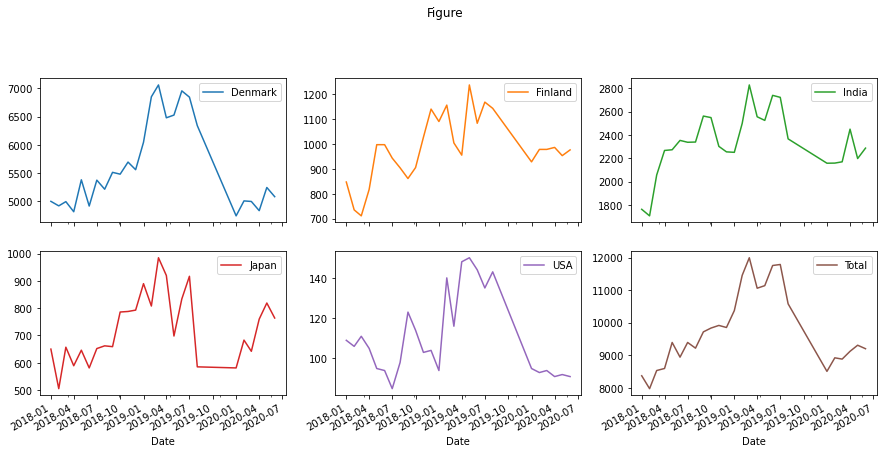

In [27]:
# Creating subplots/line charts for each country and total
EMP_Sum.plot(subplots=True, title='Figure', layout=(3,3), figsize=(15,10), sharex=True);

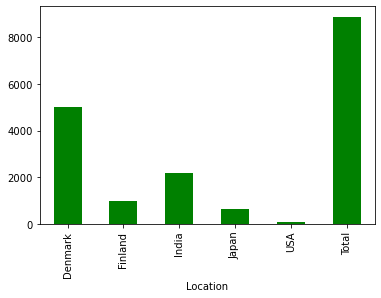

In [28]:
# Creating bar chart for a specific day
Emp_Fig = EMP_Sum.loc['2020-03-01']
Emp_Fig.plot.bar(color='g');

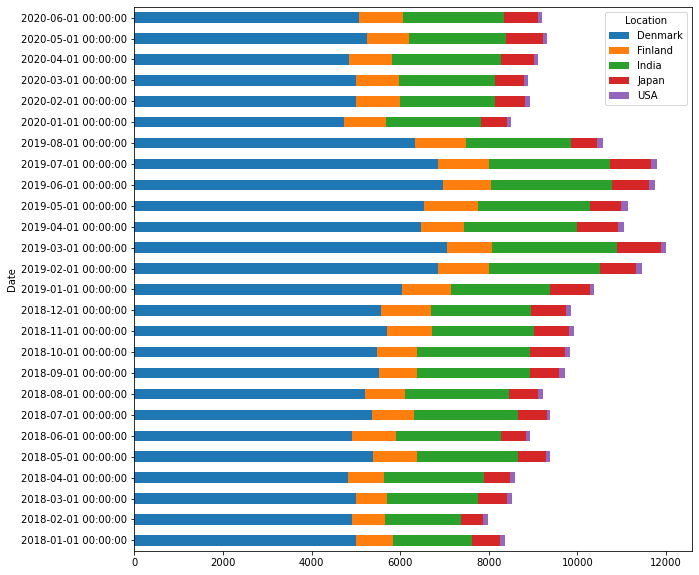

In [29]:
# Creating horizontal bar charts showing number of employees
EMP_Sum2 = EMP_Sum.drop(['Total'], axis=1) # Total column is dropped,because it is unnecessary.
EMP_Sum2.plot.barh(figsize=(10,10), stacked=True);

In [30]:
#Import datasets
DIM_Master_Acc = pd.read_csv('C://Users//kemij//Dropbox//Data//Master_Data//DIM_MASTER_ACCOUNTGROUPS.csv',sep=";")

In [31]:
#Concate master data for creating a single Master Data table
totaldata_master = pd.concat((DIM_Master_Org,DIM_Master_Acc))

In [32]:
totaldata_master

Location Code Location    Company Department Number  Cost Center  \
0        1,000.00    India  Company B              70_9        98.00   
1        1,000.00    India  Company B              70_9        99.00   
2        1,000.00    India  Company B              70_9       101.00   
3        1,000.00    India  Company B              70_9       103.00   
4        1,000.00    India  Company B              70_9       122.00   
..            ...      ...        ...               ...          ...   
11            nan      NaN        NaN               NaN          nan   
12            nan      NaN        NaN               NaN          nan   
13            nan      NaN        NaN               NaN          nan   
14            nan      NaN        NaN               NaN          nan   
15            nan      NaN        NaN               NaN          nan   

    Account 2-digits           Account Type Account Group  
0                nan                    NaN           NaN  
1                nan                    NaN           NaN  
2                nan                    NaN           NaN  
3                nan                    NaN           NaN  
4                nan                    NaN           NaN  
..               ...                    ...           ...  
11             37.00  Depreciation-IT Equip   Other Costs  
12             38.00      Capacity Costs-1    Other Costs  
13             39.00       Capacity Costs-2   Other Costs  
14             47.00       Capacity Costs-3   Other Costs  
15             48.00       Capacity Costs-4   Other Costs  

[693 rows x 8 columns]

In [33]:
# Filling NaN values with '0' in Totaldata Master table 
totaldata_master.fillna(0, inplace=True)

In [34]:
# Creating and empty dataframe for merging all Actual Costs files in a single dataframe
# Reading all Actual Costs files and append them to a single dataframe
fulldata = []
for f in totalcost:
    fulldata.append(pd.read_csv(f,sep=';',decimal=','))

In [35]:
#Concatenating total cost to a single dataset
totaldata_cost = pd.concat(fulldata)

In [36]:
totaldata_cost

Account number     Year  Month    Value DKK  Cost Center
0      CCNN/20101000  K4/2018      1 1,305,040.96          435
1      CCNN/20101000  K4/2018      2 1,301,487.17          435
2      CCNN/20101000  K4/2018      3 1,193,666.78          435
3      CCNN/20101000  K4/2018      4 1,322,704.11          435
4      CCNN/20101000  K4/2018      5 1,322,704.11          435
...              ...      ...    ...          ...          ...
65530  CCNN/24241000  K4/2020      4    20,235.00          565
65531  CCNN/24241000  K4/2020      5    20,235.00          565
65532  CCNN/24241000  K4/2020      6    20,235.00          565
65533  CCNN/23104000  K4/2020      1    67,450.00          565
65534  CCNN/23104000  K4/2020      2    67,450.00          565

[413295 rows x 5 columns]

In [37]:
# Finding groups in totaldata_master
totaldata_master["Account Group"].value_counts()

0                677
Other Costs        7
Manufacturing      6
People             3
Name: Account Group, dtype: int64

## Final dataframes:

EMP, totaldata_master, and totaldata_cost.

## 1. Simple analasis of total cost over 3 years
- Need to plot value DKK over year, prefferably over date (year and month)

In [38]:
# Creating of 'Year' and 'Month' column in totaldata_cost dataframe
totaldata_cost['Year'] = totaldata_cost['Year'].str.split("/").str.get(1)
totaldata_cost['Year']=totaldata_cost['Year'].astype(str)
totaldata_cost['Month']=totaldata_cost['Month'].astype(str)

In [39]:
# Checking data types in totaldata_cost dataframe
totaldata_cost.dtypes

Account number     object
Year               object
Month              object
Value DKK         float64
Cost Center         int64
dtype: object

In [40]:
totaldata_cost

Account number  Year Month    Value DKK  Cost Center
0      CCNN/20101000  2018     1 1,305,040.96          435
1      CCNN/20101000  2018     2 1,301,487.17          435
2      CCNN/20101000  2018     3 1,193,666.78          435
3      CCNN/20101000  2018     4 1,322,704.11          435
4      CCNN/20101000  2018     5 1,322,704.11          435
...              ...   ...   ...          ...          ...
65530  CCNN/24241000  2020     4    20,235.00          565
65531  CCNN/24241000  2020     5    20,235.00          565
65532  CCNN/24241000  2020     6    20,235.00          565
65533  CCNN/23104000  2020     1    67,450.00          565
65534  CCNN/23104000  2020     2    67,450.00          565

[413295 rows x 5 columns]

In [41]:
DIM_Master_Org

Location Code Location    Company Department Number  Cost Center
0             1000    India  Company B              70_9           98
1             1000    India  Company B              70_9           99
2             1000    India  Company B              70_9          101
3             1000    India  Company B              70_9          103
4             1000    India  Company B              70_9          122
..             ...      ...        ...               ...          ...
672           7000  Denmark  Company E              28_1          542
673           7000  Denmark  Company E              28_1          553
674           7000  Denmark  Company E              28_1          555
675           7000  Denmark  Company F              11_5          525
676           7000  Denmark  Company F              11_5           89

[677 rows x 5 columns]

In [42]:
DIM_Master_Acc

Account 2-digits                      Account Type  Account Group
0                 20                        Salaries-1        People 
1                 21                        Salaries-2        People 
2                 22  Pension & Bonus & Ad Hoc PayOuts        People 
3                 23                     Raw Materials  Manufacturing
4                 24                   Price Variation  Manufacturing
5                 27                 Price Adjustments  Manufacturing
6                 28                    Transport-Road  Manufacturing
7                 30                          Shipment  Manufacturing
8                 31                            Safety  Manufacturing
9                 32             Depreciation-Building    Other Costs
10                34            Depreciation-Machinery    Other Costs
11                37             Depreciation-IT Equip    Other Costs
12                38                 Capacity Costs-1     Other Costs
13                39                  Capacity Costs-2    Other Costs
14                47                  Capacity Costs-3    Other Costs
15                48                  Capacity Costs-4    Other Costs

In [43]:
# Removing spaces
totaldata_cost['Value_DKK']=totaldata_cost['Value DKK']
totaldata_cost.drop(['Value DKK'], axis=1, inplace=True)

totaldata_cost['Account_Number']=totaldata_cost['Account number']
totaldata_cost.drop(['Account number'], axis=1, inplace=True)

totaldata_cost['Cost_Center']=totaldata_cost['Cost Center']
totaldata_cost.drop(['Cost Center'], axis=1, inplace=True)

In [44]:
totaldata_cost

Year Month    Value_DKK Account_Number  Cost_Center
0      2018     1 1,305,040.96  CCNN/20101000          435
1      2018     2 1,301,487.17  CCNN/20101000          435
2      2018     3 1,193,666.78  CCNN/20101000          435
3      2018     4 1,322,704.11  CCNN/20101000          435
4      2018     5 1,322,704.11  CCNN/20101000          435
...     ...   ...          ...            ...          ...
65530  2020     4    20,235.00  CCNN/24241000          565
65531  2020     5    20,235.00  CCNN/24241000          565
65532  2020     6    20,235.00  CCNN/24241000          565
65533  2020     1    67,450.00  CCNN/23104000          565
65534  2020     2    67,450.00  CCNN/23104000          565

[413295 rows x 5 columns]

# Merging cost with location


# 2. Compare costs

- Need to visualize the costs (summed) for all countries


In [45]:
# Removing spaces
DIM_Master_Acc['Account_2digits']=DIM_Master_Acc['Account 2-digits']
DIM_Master_Acc.drop(['Account 2-digits'], axis=1, inplace=True)

DIM_Master_Acc['Account_Type']=DIM_Master_Acc['Account Type']
DIM_Master_Acc.drop(['Account Type'], axis=1, inplace=True)

DIM_Master_Acc['Account_Group']=DIM_Master_Acc['Account Group']
DIM_Master_Acc.drop(['Account Group'], axis=1, inplace=True)

In [46]:
DIM_Master_Acc

Account_2digits                      Account_Type  Account_Group
0                20                        Salaries-1        People 
1                21                        Salaries-2        People 
2                22  Pension & Bonus & Ad Hoc PayOuts        People 
3                23                     Raw Materials  Manufacturing
4                24                   Price Variation  Manufacturing
5                27                 Price Adjustments  Manufacturing
6                28                    Transport-Road  Manufacturing
7                30                          Shipment  Manufacturing
8                31                            Safety  Manufacturing
9                32             Depreciation-Building    Other Costs
10               34            Depreciation-Machinery    Other Costs
11               37             Depreciation-IT Equip    Other Costs
12               38                 Capacity Costs-1     Other Costs
13               39                  Capacity Costs-2    Other Costs
14               47                  Capacity Costs-3    Other Costs
15               48                  Capacity Costs-4    Other Costs

In [47]:
DIM_Master_Org['Location_Code']=DIM_Master_Org['Location Code']
DIM_Master_Org.drop(['Location Code'], axis=1, inplace=True)

DIM_Master_Org['Department_Number']=DIM_Master_Org['Department Number']
DIM_Master_Org.drop(['Department Number'], axis=1, inplace=True)

DIM_Master_Org['Cost_Center']=DIM_Master_Org['Cost Center']
DIM_Master_Org.drop(['Cost Center'], axis=1, inplace=True)

In [48]:
DIM_Master_Org

Location    Company  Location_Code Department_Number  Cost_Center
0      India  Company B           1000              70_9           98
1      India  Company B           1000              70_9           99
2      India  Company B           1000              70_9          101
3      India  Company B           1000              70_9          103
4      India  Company B           1000              70_9          122
..       ...        ...            ...               ...          ...
672  Denmark  Company E           7000              28_1          542
673  Denmark  Company E           7000              28_1          553
674  Denmark  Company E           7000              28_1          555
675  Denmark  Company F           7000              11_5          525
676  Denmark  Company F           7000              11_5           89

[677 rows x 5 columns]

In [49]:
# Merging totaldata_cost dataframe with DIM_Master_Org on the Cost Center.
merged = totaldata_cost.merge(DIM_Master_Org, on='Cost_Center', how='left')

In [50]:
merged.dtypes

Year                  object
Month                 object
Value_DKK            float64
Account_Number        object
Cost_Center            int64
Location              object
Company               object
Location_Code          int64
Department_Number     object
dtype: object

In [51]:
# Making a table that only shows Year, Month, Value_DKK and Location.
summary = merged[["Year", "Month","Value_DKK", "Location"]]
summary

Year Month    Value_DKK Location
0       2018     1 1,305,040.96    Japan
1       2018     1 1,305,040.96  Denmark
2       2018     2 1,301,487.17    Japan
3       2018     2 1,301,487.17  Denmark
4       2018     3 1,193,666.78    Japan
...      ...   ...          ...      ...
419539  2020     4    20,235.00  Denmark
419540  2020     5    20,235.00  Denmark
419541  2020     6    20,235.00  Denmark
419542  2020     1    67,450.00  Denmark
419543  2020     2    67,450.00  Denmark

[419544 rows x 4 columns]

In [52]:
# Turning Date into datetime using pd.to_datetime.
summary['dateInt']=summary['Year'].astype(str) + summary['Month'].astype(str).str.zfill(2)
summary['Date'] = pd.to_datetime(summary['dateInt'], format='%Y%m')

<ipython-input-52-3c4f4236fbb3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-52-3c4f4236fbb3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
#Extract Year Month and YYYY-MM using this
summary['Year'] = summary['Date'].dt.year
summary['Month'] = summary['Date'].dt.month
summary['YYYY-MM'] = summary['Date'].dt.strftime('%Y-%m')

<ipython-input-53-5b4c7a7a48fe>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-5b4c7a7a48fe>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-5b4c7a7a48fe>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
summary.dtypes

Year                  int64
Month                 int64
Value_DKK           float64
Location             object
dateInt              object
Date         datetime64[ns]
YYYY-MM              object
dtype: object

In [55]:
# 1a. First lets do the groupby and sorting the long way
summary2 = summary.groupby(['YYYY-MM', 'Date']).Value_DKK.sum().reset_index()
summary2.sort_values(by=['YYYY-MM'], inplace = True)

In [56]:
# All cost based on 'Date'
summary2

YYYY-MM       Date      Value_DKK
0   2018-01 2018-01-01  85,777,458.06
1   2018-02 2018-02-01  37,881,823.95
2   2018-03 2018-03-01 935,938,207.22
3   2018-04 2018-04-01 778,493,086.47
4   2018-05 2018-05-01 809,703,368.64
5   2018-06 2018-06-01 809,461,297.75
6   2018-07 2018-07-01 853,568,712.71
7   2018-08 2018-08-01 875,117,844.25
8   2018-09 2018-09-01 906,205,062.99
9   2018-10 2018-10-01 874,759,857.24
10  2018-11 2018-11-01 899,065,092.12
11  2018-12 2018-12-01 942,070,802.20
12  2019-01 2019-01-01 652,772,748.30
13  2019-02 2019-02-01 778,468,101.68
14  2019-03 2019-03-01 722,969,894.46
15  2019-04 2019-04-01 778,163,156.67
16  2019-05 2019-05-01 809,256,878.75
17  2019-06 2019-06-01 759,634,714.72
18  2019-07 2019-07-01 795,956,859.14
19  2019-08 2019-08-01 766,495,169.25
20  2020-01 2020-01-01 739,503,346.87
21  2020-02 2020-02-01 775,453,126.36
22  2020-03 2020-03-01 757,458,350.50
23  2020-04 2020-04-01 767,518,944.86
24  2020-05 2020-05-01 798,687,455.00
25  2020-06 2020-06-01 786,616,782.46

In this dataframe there is missing 4 months in 2019. The months being September, October, November, December.

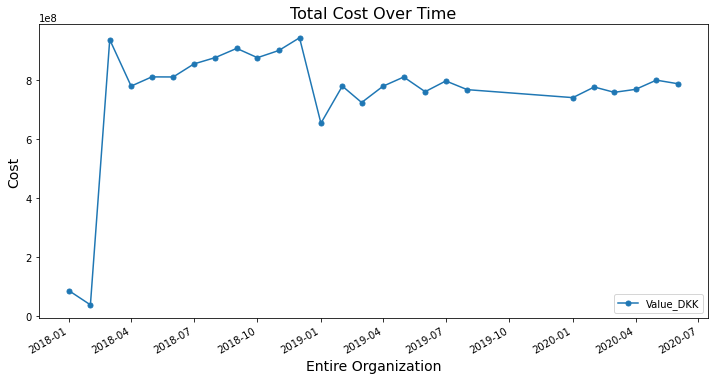

In [57]:
#ax = Employees.plot(x='Date', y='Employees', label ='Entire Organization' , figsize=(12,6), title = 'Employee growth over time', marker ='.', markersize=10)

ax = summary2.plot(x='Date', y='Value_DKK', figsize=(12,6), marker ='.', markersize=10)
plt.legend(loc='lower right')

ax.set_ylabel('Cost',fontsize = 14)
ax.set_xlabel('Entire Organization', fontsize = 14)
ax.set_title('Total Cost Over Time',fontsize = 16);

The graph shows the total cost for the entrie organization. From February to March 2018 there is a huge increase of cost in the entire organization and it stays relatively stable after this increase.

In [58]:
# Plot all the countries in one graph
summary_Sum = summary.groupby(['Location','YYYY-MM', 'Date']).Value_DKK.sum().reset_index()
summary.sort_values(by=['YYYY-MM'], inplace = True)
summary_Sum = pd.pivot_table(summary_Sum, values = 'Value_DKK', index=['Date'], columns=['Location'], aggfunc=sum)
summary_Sum['Total']=summary_Sum['Denmark']+summary_Sum['Finland']+summary_Sum['India']+summary_Sum['Japan']+summary_Sum['USA']

<ipython-input-58-193f4876a272>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
# Summary table of total cost according to based on country
summary_Sum

Location          Denmark        Finland         India         Japan  \
Date                                                                   
2018-01-01  26,953,634.92   8,302,765.12 -3,858,838.25 45,728,227.22   
2018-02-01 -40,491,078.31   5,044,748.33 15,921,116.72 48,043,356.59   
2018-03-01 905,168,330.43 -27,180,076.46  2,891,111.21 42,627,695.88   
2018-04-01 584,761,486.52  85,746,079.94 43,540,252.76 52,943,991.12   
2018-05-01 614,476,410.97  84,823,783.75 41,758,173.03 56,857,494.50   
2018-06-01 613,501,835.79  85,766,139.83 45,243,763.45 53,019,979.54   
2018-07-01 646,934,752.72  96,511,815.99 42,454,084.78 55,840,576.23   
2018-08-01 662,059,689.99  98,454,641.65 45,235,066.24 57,668,136.75   
2018-09-01 688,580,544.49 100,063,367.24 46,618,300.25 58,359,948.71   
2018-10-01 664,730,881.98  97,126,182.45 42,919,001.66 58,057,867.41   
2018-11-01 686,195,165.93  98,497,180.11 43,781,952.24 58,514,331.47   
2018-12-01 720,840,990.41 101,749,448.05 50,306,280.38 56,877,357.49   
2019-01-01 505,300,752.75  30,914,889.90 25,013,305.70 73,698,307.71   
2019-02-01 589,030,290.66  20,844,478.33 64,421,411.70 86,077,331.38   
2019-03-01 588,935,767.61  11,101,946.92 20,651,539.28 82,312,347.90   
2019-04-01 629,628,675.10  30,018,903.27 21,930,864.24 79,552,859.46   
2019-05-01 644,965,548.56  28,032,288.47 35,361,668.75 84,016,707.28   
2019-06-01 593,662,520.42  32,348,772.92 32,772,322.79 81,391,398.97   
2019-07-01 567,102,061.80  91,328,812.85 39,109,309.11 82,846,475.99   
2019-08-01 569,262,325.25  61,701,597.44 39,716,496.04 81,051,889.80   
2020-01-01 549,898,799.55  78,603,450.97 39,696,830.27 61,486,363.85   
2020-02-01 579,518,972.93  79,029,177.98 40,994,247.19 65,648,689.88   
2020-03-01 565,804,973.31  78,031,683.77 41,483,645.64 62,097,670.91   
2020-04-01 576,785,494.78  78,182,649.43 40,971,177.85 61,302,486.37   
2020-05-01 601,923,453.95  82,182,849.90 40,811,219.18 63,355,989.09   
2020-06-01 590,366,717.28  80,798,367.60 42,911,779.48 62,063,758.29   

Location             USA          Total  
Date                                     
2018-01-01  8,651,669.06  85,777,458.06  
2018-02-01  9,363,680.62  37,881,823.95  
2018-03-01 12,431,146.16 935,938,207.22  
2018-04-01 11,501,276.12 778,493,086.47  
2018-05-01 11,787,506.40 809,703,368.64  
2018-06-01 11,929,579.14 809,461,297.75  
2018-07-01 11,827,482.99 853,568,712.71  
2018-08-01 11,700,309.62 875,117,844.25  
2018-09-01 12,582,902.29 906,205,062.99  
2018-10-01 11,925,923.73 874,759,857.24  
2018-11-01 12,076,462.38 899,065,092.12  
2018-12-01 12,296,725.86 942,070,802.20  
2019-01-01 17,845,492.25 652,772,748.30  
2019-02-01 18,094,589.60 778,468,101.68  
2019-03-01 19,968,292.75 722,969,894.46  
2019-04-01 17,031,854.60 778,163,156.67  
2019-05-01 16,880,665.69 809,256,878.75  
2019-06-01 19,459,699.62 759,634,714.72  
2019-07-01 15,570,199.38 795,956,859.14  
2019-08-01 14,762,860.72 766,495,169.25  
2020-01-01  9,817,902.24 739,503,346.87  
2020-02-01 10,262,038.37 775,453,126.36  
2020-03-01 10,040,376.87 757,458,350.50  
2020-04-01 10,277,136.42 767,518,944.86  
2020-05-01 10,413,942.88 798,687,455.00  
2020-06-01 10,476,159.81 786,616,782.46

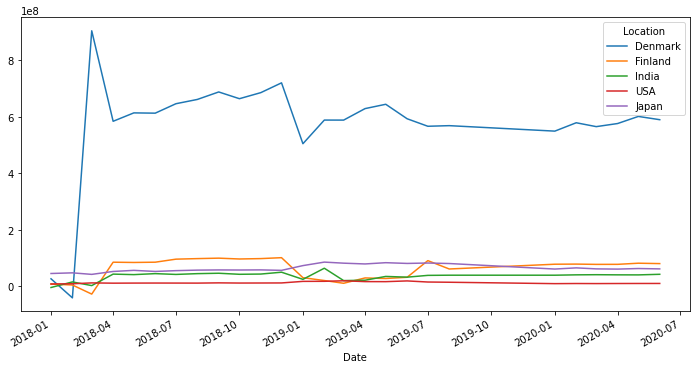

In [60]:
# Line chart of total cost according to country
summary_Sum.plot(y=['Denmark','Finland','India','USA','Japan'],figsize=(12,6));

The graph shows Denmark being the main reason the organization has increased the cost by so much. The other countries are more stable in cost than Denmark.

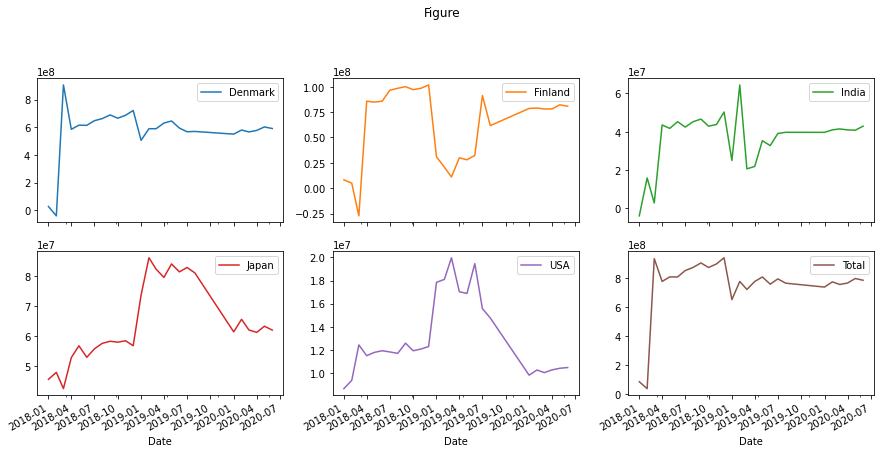

In [61]:
# Creating line charts for each country and total
summary_Sum.plot(subplots=True, title='Figure', layout=(3,3), figsize=(15,10), sharex=True);

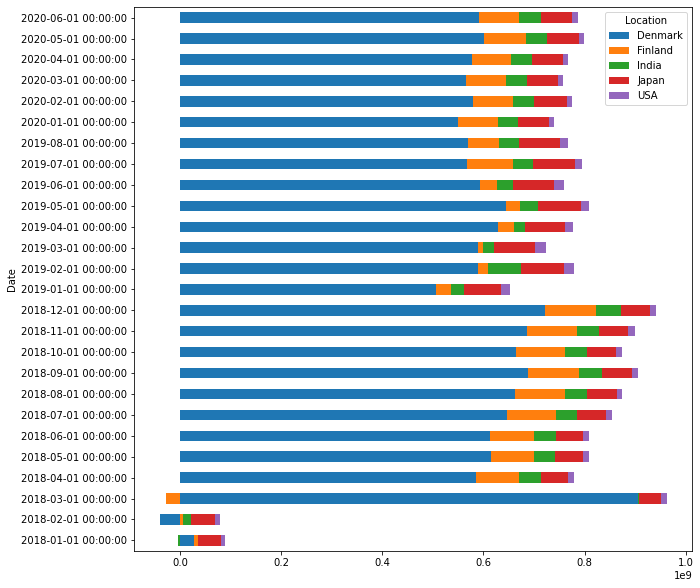

In [62]:
# Creating horizontal bar charts showing number of employees
summary_Sum2 = summary_Sum.drop(['Total'], axis=1) # Total column is dropped,because it is unnecessary.
summary_Sum2.plot.barh(figsize=(10,10), stacked=True);

In [63]:
# Grouping summary by Location, Year and Month.
grouped = summary.groupby(["Location", "Year", "Month"])
grouped.first()

Value_DKK dateInt       Date  YYYY-MM
Location Year Month                                       
Denmark  2018 1      77,399.21  201801 2018-01-01  2018-01
              2       4,000.24  201802 2018-02-01  2018-02
              3     536,555.84  201803 2018-03-01  2018-03
              4       8,744.23  201804 2018-04-01  2018-04
              5       4,484.02  201805 2018-05-01  2018-05
...                        ...     ...        ...      ...
USA      2020 2      96,204.74  202002 2020-02-01  2020-02
              3       4,114.45  202003 2020-03-01  2020-03
              4      25,720.90  202004 2020-04-01  2020-04
              5         284.71  202005 2020-05-01  2020-05
              6      -1,191.94  202006 2020-06-01  2020-06

[130 rows x 4 columns]

In [64]:
summary["Location"].value_counts()

Denmark    302285
Japan       43110
Finland     40288
India       24859
USA          9002
Name: Location, dtype: int64

In [65]:
denmark = summary[summary["Location"] == "Denmark"]
denmark["Value_DKK"].sum()

14925898999.787394

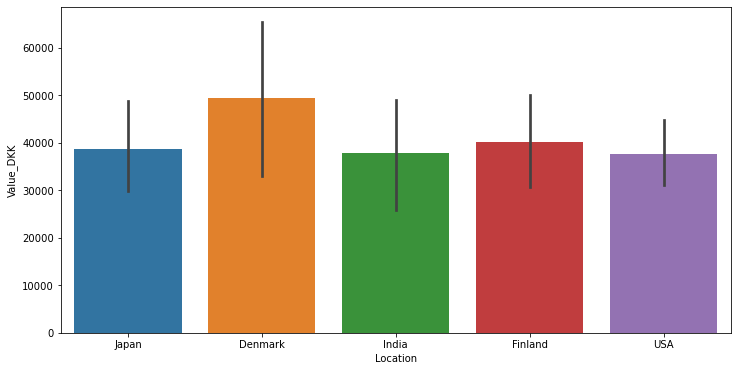

In [66]:
# Plotting a barplot showing totalcost across all countries.
ax = plt.figure(figsize =(12,6))
ax = sns.barplot(x="Location", y="Value_DKK", data=summary)

In [67]:
for country in summary['Location'].unique():
    acountry = summary[summary["Location"] == country]
    value = acountry["Value_DKK"].max()
    print("{} has max value of {}".format(country,value))

Japan has max value of 91634705.2
Denmark has max value of 761058762.8
India has max value of 77918132.64
Finland has max value of 49816682.82
USA has max value of 10352060.29


- Denmark has a very high max value cost as compared to the other countries

Japan 1671441239.8112898
Denmark 14925898999.787394
India 942656081.68012
Finland 1618025945.7688398
USA 338975875.5761349


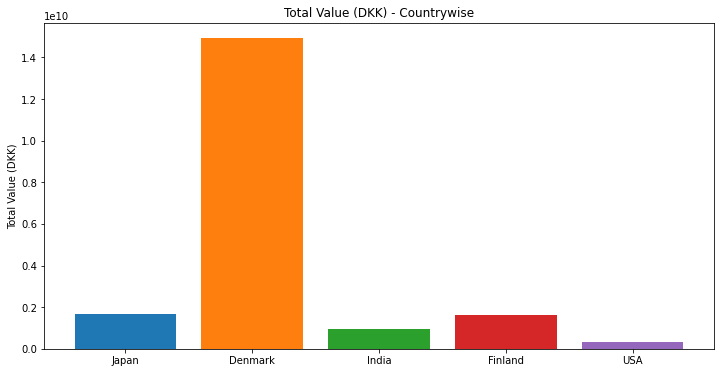

In [68]:
# Plotting a histogram showing total cost across each country
plt.figure(figsize =(12,6))
for country in summary['Location'].unique():
    acountry = summary[summary["Location"] == country]
    value = acountry["Value_DKK"].sum()
    plt.bar(country, value)
    plt.ylabel("Total Value (DKK)")
    plt.title("Total Value (DKK) - Countrywise")
    print(country, value)

- Denmark has substantial higher costs than the other countries

# 3. Cost/Employees across Locations
- Need to use EMP data

- Need to join master1 with master2 where account numbers match first 2 digits


In [69]:
# Have to use EMP data, but rename it as EMP2 to find only people cost.

EMP2 = EMP
EMP2

Cost Center       Date  Employees  Year  Month  YYYY-MM
0              360 2018-01-01       2.00  2018      1  2018-01
1              239 2018-01-01       1.00  2018      1  2018-01
2              518 2018-01-01       0.00  2018      1  2018-01
3               84 2018-01-01       0.00  2018      1  2018-01
4              537 2018-01-01       0.00  2018      1  2018-01
...            ...        ...        ...   ...    ...      ...
13073          124 2020-06-01     138.00  2020      6  2020-06
13074          119 2020-06-01     197.00  2020      6  2020-06
13075          110 2020-06-01      24.00  2020      6  2020-06
13076           97 2020-06-01       2.00  2020      6  2020-06
13077          100 2020-06-01     639.00  2020      6  2020-06

[13078 rows x 6 columns]

In [70]:
# Removing space from Cost Center
EMP2['Cost_Center']=EMP2['Cost Center']
EMP2.drop(['Cost Center'], axis=1, inplace=True)

In [71]:
# Merging totaldata_cost to DIM_Master_Org on Cost Center
merged2 = DIM_Master_Org.merge(totaldata_cost, on='Cost_Center', how='left')
merged2.head(20)

Location    Company  Location_Code Department_Number  Cost_Center  Year  \
0     India  Company B           1000              70_9           98  2018   
1     India  Company B           1000              70_9           98  2018   
2     India  Company B           1000              70_9           98  2018   
3     India  Company B           1000              70_9           98  2018   
4     India  Company B           1000              70_9           98  2018   
5     India  Company B           1000              70_9           98  2018   
6     India  Company B           1000              70_9           98  2018   
7     India  Company B           1000              70_9           98  2018   
8     India  Company B           1000              70_9           98  2018   
9     India  Company B           1000              70_9           98  2018   
10    India  Company B           1000              70_9           98  2018   
11    India  Company B           1000              70_9           98  2018   
12    India  Company B           1000              70_9           98  2018   
13    India  Company B           1000              70_9           98  2018   
14    India  Company B           1000              70_9           98  2018   
15    India  Company B           1000              70_9           98  2018   
16    India  Company B           1000              70_9           98  2018   
17    India  Company B           1000              70_9           98  2018   
18    India  Company B           1000              70_9           98  2018   
19    India  Company B           1000              70_9           98  2018   

   Month  Value_DKK Account_Number  
0      2   9,592.20  CCNN/22401000  
1      3   1,759.01  CCNN/22401000  
2      4  -1,261.44  CCNN/22401000  
3      5  -1,261.44  CCNN/22401000  
4      6  -1,261.44  CCNN/22401000  
5      4      -3.50  CCNN/22303000  
6      5      -3.50  CCNN/22303000  
7      6      -3.50  CCNN/22303000  
8      1   2,956.50  CCNN/22399000  
9      2  76,714.88  CCNN/22399000  
10     3  -6,831.10  CCNN/22399000  
11     4     861.11  CCNN/22399000  
12     5     861.11  CCNN/22399000  
13     6     861.11  CCNN/22399000  
14     4   1,216.76  CCNN/24209900  
15     5   4,867.06  CCNN/24209900  
16     6   4,867.06  CCNN/24209900  
17     1     402.31  CCNN/24210000  
18     2     730.93  CCNN/24212000  
19     4     -81.47  CCNN/24212000

In [72]:
# extract the 2 digits in Account Number

list = []
for i in range(len(merged2["Account_Number"])):
    acc = merged2["Account_Number"][i]
    d2 = acc[5:7]
    list.append(d2)

# add as seperate column
merged2["Account_2digits"] = list

# new column added
merged2.drop('Account_Number', axis=1, inplace=True)
merged2.head()

Location    Company  Location_Code Department_Number  Cost_Center  Year  \
0    India  Company B           1000              70_9           98  2018   
1    India  Company B           1000              70_9           98  2018   
2    India  Company B           1000              70_9           98  2018   
3    India  Company B           1000              70_9           98  2018   
4    India  Company B           1000              70_9           98  2018   

  Month  Value_DKK Account_2digits  
0     2   9,592.20              22  
1     3   1,759.01              22  
2     4  -1,261.44              22  
3     5  -1,261.44              22  
4     6  -1,261.44              22

In [73]:
# Extract only account numbers: 20, 21, 22. Because these account numbers belong to people cost.
merged3 = merged2.loc[(merged2['Account_2digits'].isin(['20','21','22']))]

In [74]:
merged3.head()

Location    Company  Location_Code Department_Number  Cost_Center  Year  \
0    India  Company B           1000              70_9           98  2018   
1    India  Company B           1000              70_9           98  2018   
2    India  Company B           1000              70_9           98  2018   
3    India  Company B           1000              70_9           98  2018   
4    India  Company B           1000              70_9           98  2018   

  Month  Value_DKK Account_2digits  
0     2   9,592.20              22  
1     3   1,759.01              22  
2     4  -1,261.44              22  
3     5  -1,261.44              22  
4     6  -1,261.44              22

In [75]:
merged3.Account_2digits.unique()

array(['22', '21', '20'], dtype=object)

In [76]:
merged3.dtypes

Location              object
Company               object
Location_Code          int64
Department_Number     object
Cost_Center            int64
Year                  object
Month                 object
Value_DKK            float64
Account_2digits       object
dtype: object

In [77]:
# Turning 'Year' and 'Month' into a string to create Date column.
merged3['dateInt']=merged3['Year'].astype(str) + merged3['Month'].astype(str).str.zfill(2)
merged3['Date'] = pd.to_datetime(merged3['dateInt'], format='%Y%m')

<ipython-input-77-d545aac0b1d6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-d545aac0b1d6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
# Creating a date column
merged3['Year'] = merged3['Date'].dt.year
merged3['Month'] = merged3['Date'].dt.month
merged3['YYYY-MM'] = merged3['Date'].dt.strftime('%Y-%m')

<ipython-input-78-d98520a14511>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-d98520a14511>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-d98520a14511>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
# Plot all the countries in one graph
merged3_sum = merged3.groupby(['Location','YYYY-MM', 'Date']).Value_DKK.sum().reset_index()
merged3.sort_values(by=['YYYY-MM'], inplace = True)
merged3_sum = pd.pivot_table(merged3_sum, values = 'Value_DKK', index=['Date'], columns=['Location'], aggfunc=sum)
merged3_sum['Total']=merged3_sum['Denmark']+merged3_sum['Finland']+merged3_sum['India']+merged3_sum['Japan']+merged3_sum['USA']

<ipython-input-79-fa7a9fec7b5f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
merged3_sum

Location          Denmark       Finland         India         Japan  \
Date                                                                  
2018-01-01 305,512,817.07 47,818,654.53  7,797,083.73 35,654,063.68   
2018-02-01 307,793,047.03 40,352,681.37 22,955,150.04 36,406,051.50   
2018-03-01 299,535,382.68 39,128,724.21 22,135,167.52 35,409,570.34   
2018-04-01 302,950,153.45 45,066,127.33 24,310,033.55 37,382,901.89   
2018-05-01 315,900,945.37 47,083,668.64 24,540,484.98 38,030,880.84   
2018-06-01 312,169,653.21 46,214,701.55 24,807,789.77 37,443,567.90   
2018-07-01 338,460,315.21 50,515,402.31 24,772,448.15 41,274,941.60   
2018-08-01 335,635,094.36 50,480,264.76 24,836,008.26 41,694,124.15   
2018-09-01 328,982,324.20 51,902,546.84 25,265,864.94 41,601,395.08   
2018-10-01 328,535,061.64 51,797,837.18 24,959,077.39 42,149,724.93   
2018-11-01 333,593,781.28 52,959,866.29 25,630,759.41 41,818,779.67   
2018-12-01 327,872,725.75 53,522,542.60 25,158,944.94 42,077,610.10   
2019-01-01 374,338,692.41 57,685,917.44 14,925,898.47 48,072,177.44   
2019-02-01 443,278,642.74 60,383,736.64 31,331,610.99 55,764,176.19   
2019-03-01 434,610,731.40 58,970,080.91 30,886,817.29 55,836,153.46   
2019-04-01 432,002,436.71 62,198,302.81 30,760,448.32 51,765,159.17   
2019-05-01 459,764,869.59 62,732,674.67 30,702,621.17 56,102,581.59   
2019-06-01 443,125,553.93 66,660,565.47 30,000,744.41 52,293,183.98   
2019-07-01 441,408,989.36 65,331,013.34 32,258,589.19 51,597,663.75   
2019-08-01 408,718,075.72 53,544,452.73 22,310,557.08 48,950,576.34   
2020-01-01 288,566,994.01 44,656,544.03 23,906,625.69 39,218,402.80   
2020-02-01 302,166,178.99 45,269,400.74 23,910,318.84 42,462,179.27   
2020-03-01 292,189,723.59 44,091,076.80 24,094,676.14 40,437,014.41   
2020-04-01 296,382,370.20 45,420,885.36 24,993,746.71 41,779,063.82   
2020-05-01 311,382,761.05 48,487,603.96 25,123,149.00 43,599,079.50   
2020-06-01 301,987,572.59 45,647,572.07 25,163,510.74 42,288,269.80   

Location            USA          Total  
Date                                    
2018-01-01 5,961,488.26 402,744,107.26  
2018-02-01 5,790,300.79 413,297,230.74  
2018-03-01 6,158,408.84 402,367,253.60  
2018-04-01 6,284,933.29 415,994,149.51  
2018-05-01 6,708,718.74 432,264,698.58  
2018-06-01 6,699,910.24 427,335,622.67  
2018-07-01 6,733,621.11 461,756,728.38  
2018-08-01 6,929,361.27 459,574,852.79  
2018-09-01 7,288,872.27 455,041,003.32  
2018-10-01 6,858,233.71 454,299,934.86  
2018-11-01 6,716,217.29 460,719,403.93  
2018-12-01 6,740,770.72 455,372,594.10  
2019-01-01 6,770,154.44 501,792,840.20  
2019-02-01 7,602,025.11 598,360,191.68  
2019-03-01 8,397,601.69 588,701,384.76  
2019-04-01 8,307,002.45 585,033,349.46  
2019-05-01 8,083,661.64 617,386,408.66  
2019-06-01 7,932,465.71 600,012,513.49  
2019-07-01 7,783,912.28 598,380,167.91  
2019-08-01 7,953,151.10 541,476,812.98  
2020-01-01 5,155,051.37 401,503,617.91  
2020-02-01 5,168,170.73 418,976,248.56  
2020-03-01 5,115,090.36 405,927,581.31  
2020-04-01 5,401,046.18 413,977,112.26  
2020-05-01 5,487,604.36 434,080,197.87  
2020-06-01 5,385,192.81 420,472,118.00

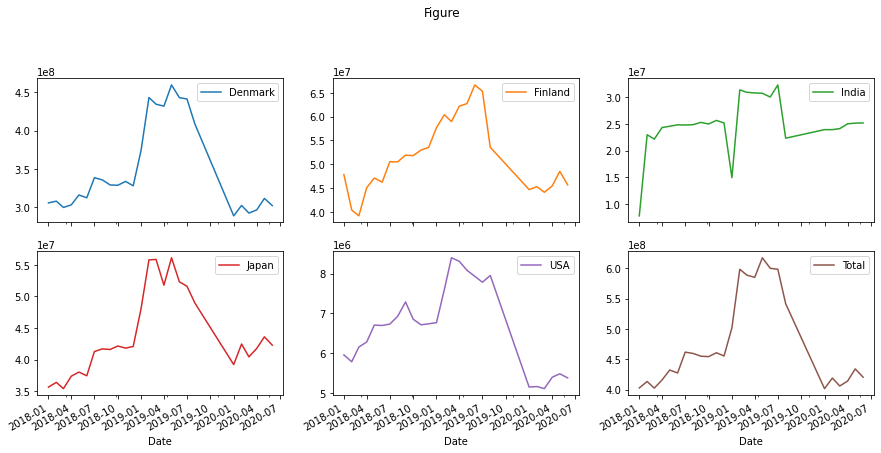

In [81]:
# Creating line charts for each country and total
merged3_sum.plot(subplots=True, title='Figure', layout=(3,3), figsize=(15,10), sharex=True);

The graph shows sharp increases and decreases in people cost in all countries. Denmark has seen the largest drop in people cost.